In [ ]:
!nvidia-smi

Sun May 11 14:52:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Get Data

In [ ]:
!pip install roboflow

from roboflow import Roboflow
#put your token
rf = Roboflow(api_key="")
project = rf.workspace("iotseecs").project("brain-tumor-yzzav")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BRAIN-TUMOR-1 in yolov11:: 100%|██████████| 1680/1680 [00:00<00:00, 1845.84it/s]


In [ ]:
!pip install ultralytics

from IPython import display
import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os

HOME =os.getcwd()
HOME

'/content'

## Train on custom dataset

In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!yolo task=segment mode=train model=yolo11s-seg.pt data={dataset.location}/data.yaml  epochs=60 imgsz=640 plots=True

100% 19.7M/19.7M [00:00<00:00, 139MB/s] 
Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/BRAIN-TUMOR-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml			 MaskP_curve.png      train_batch2.jpg
BoxF1_curve.png			 MaskPR_curve.png     val_batch0_labels.jpg
BoxP_curve.png			 MaskR_curve.png      val_batch0_pred.jpg
BoxPR_curve.png			 results.csv	      val_batch1_labels.jpg
BoxR_curve.png			 results.png	      val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch0.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch1850.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch1851.jpg  weights
labels.jpg			 train_batch1852.jpg
MaskF1_curve.png		 train_batch1.jpg


## Evaluation

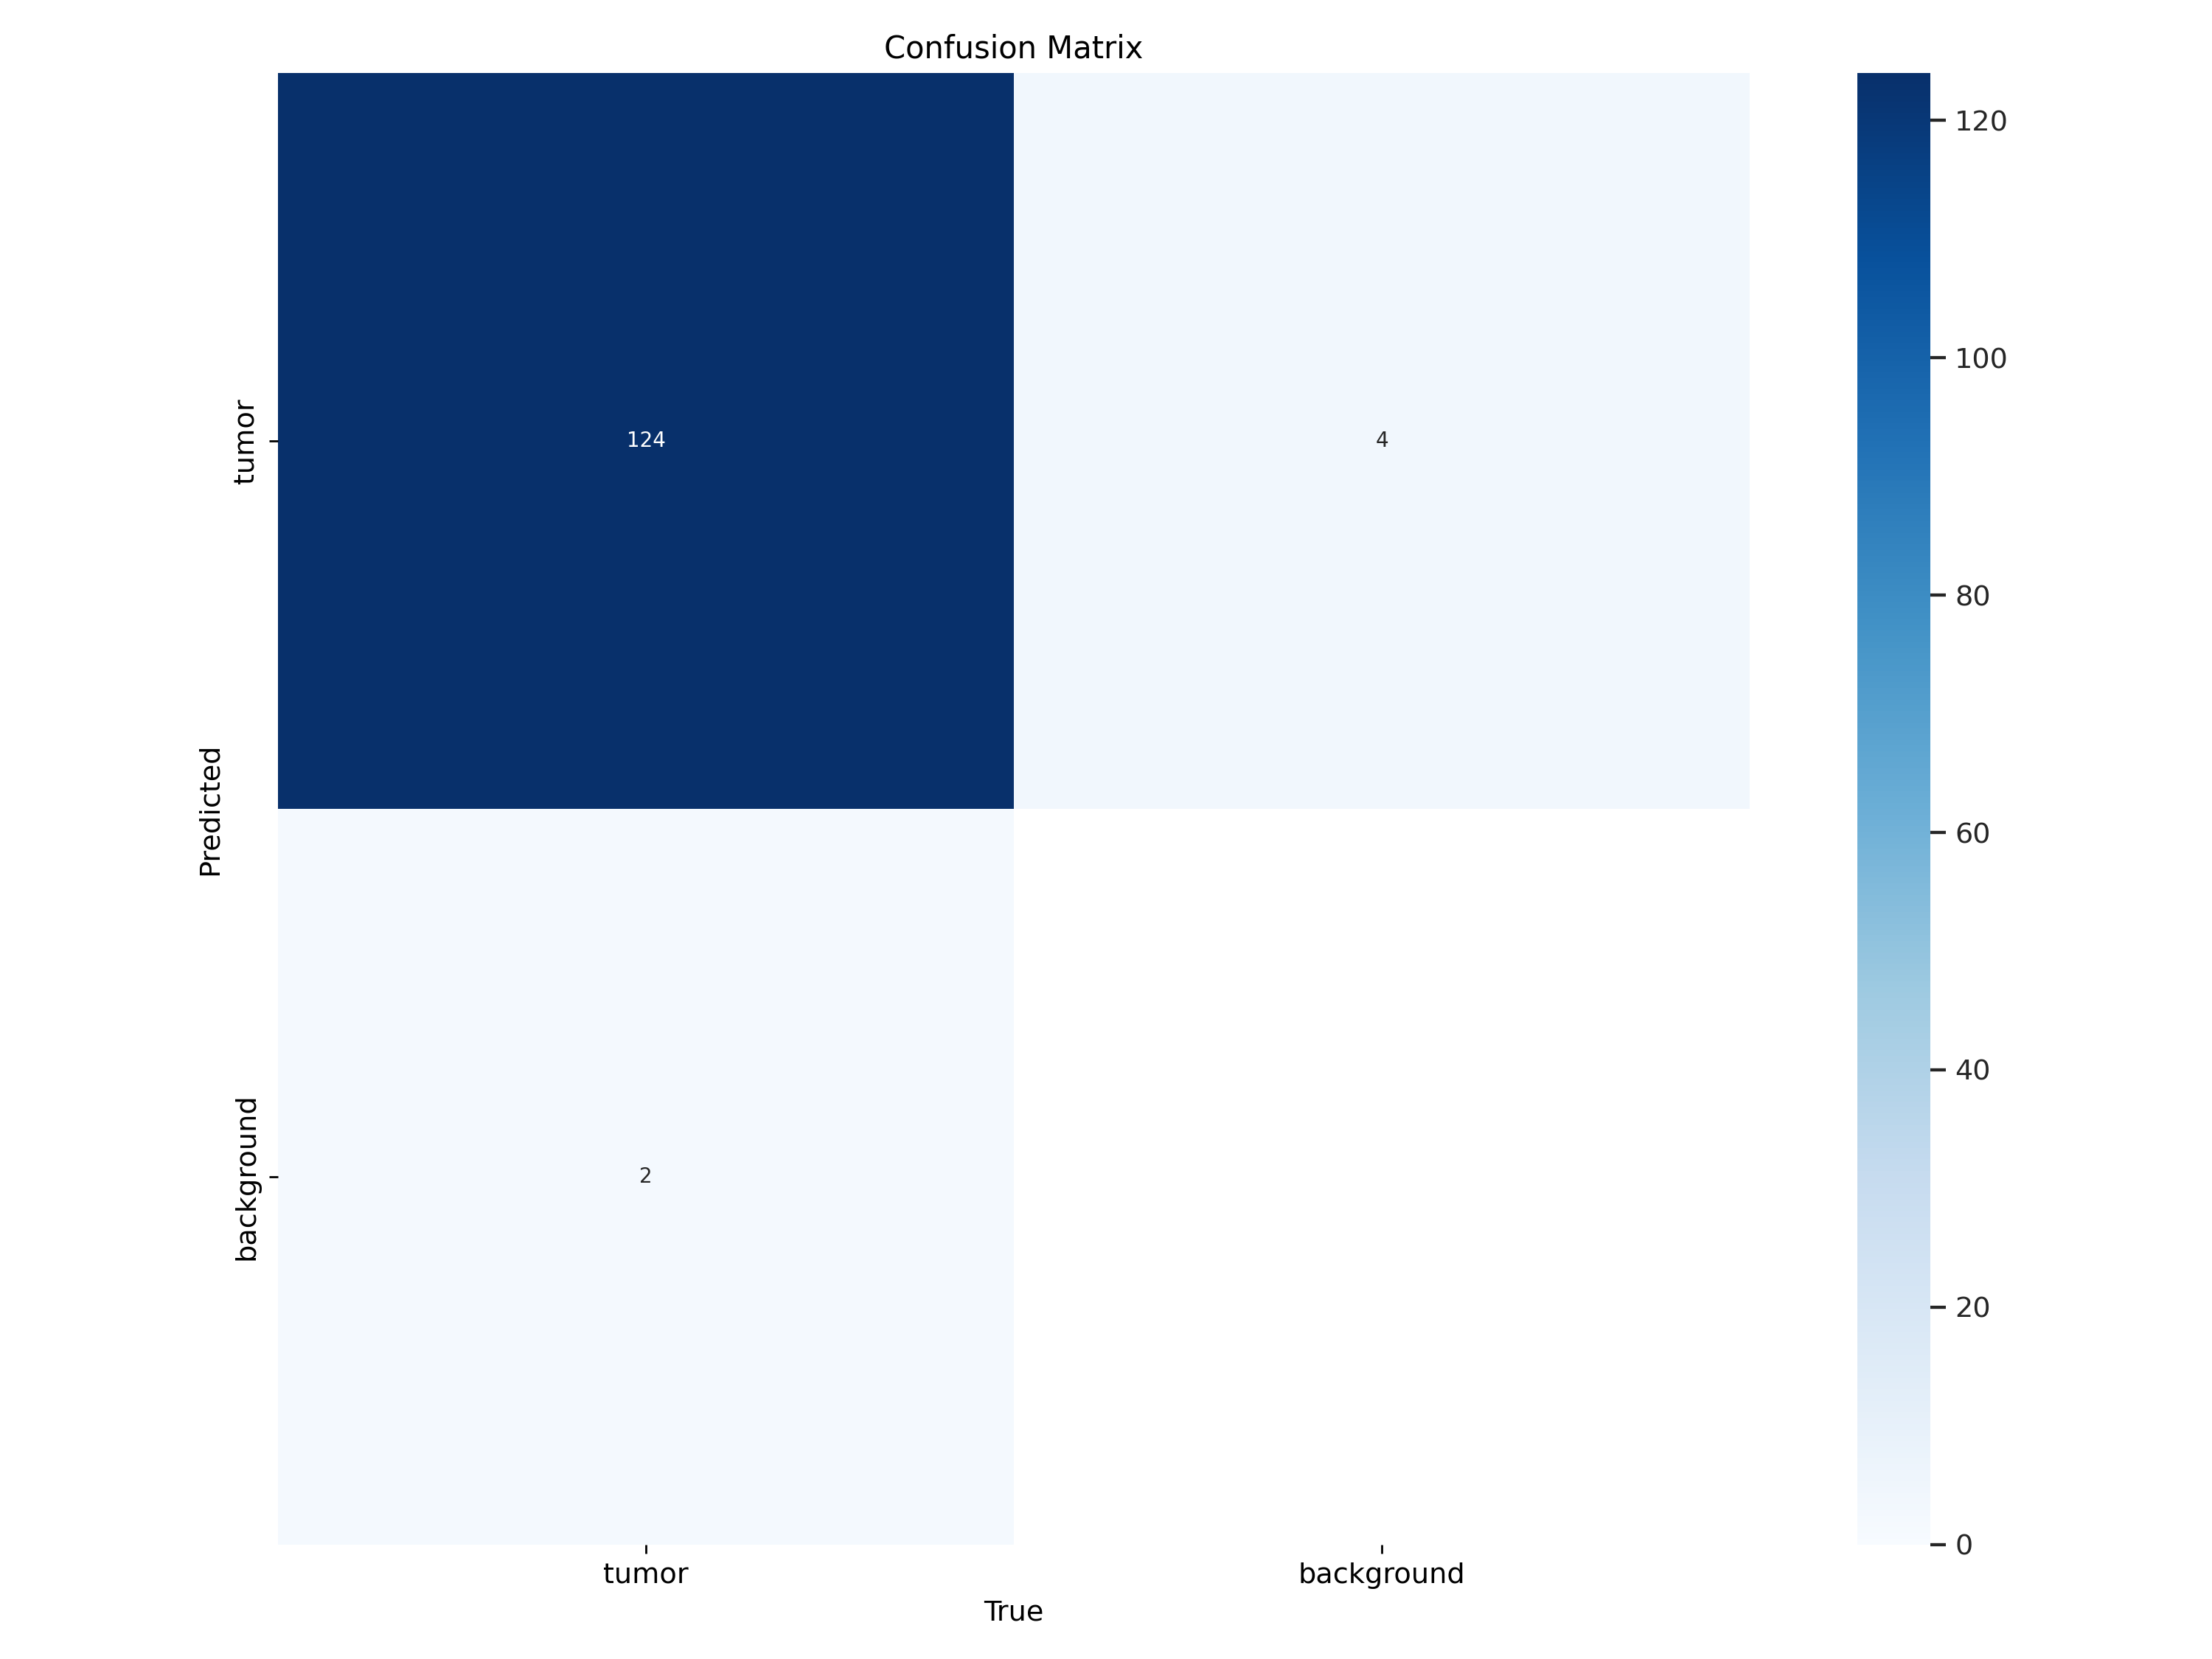

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=800)

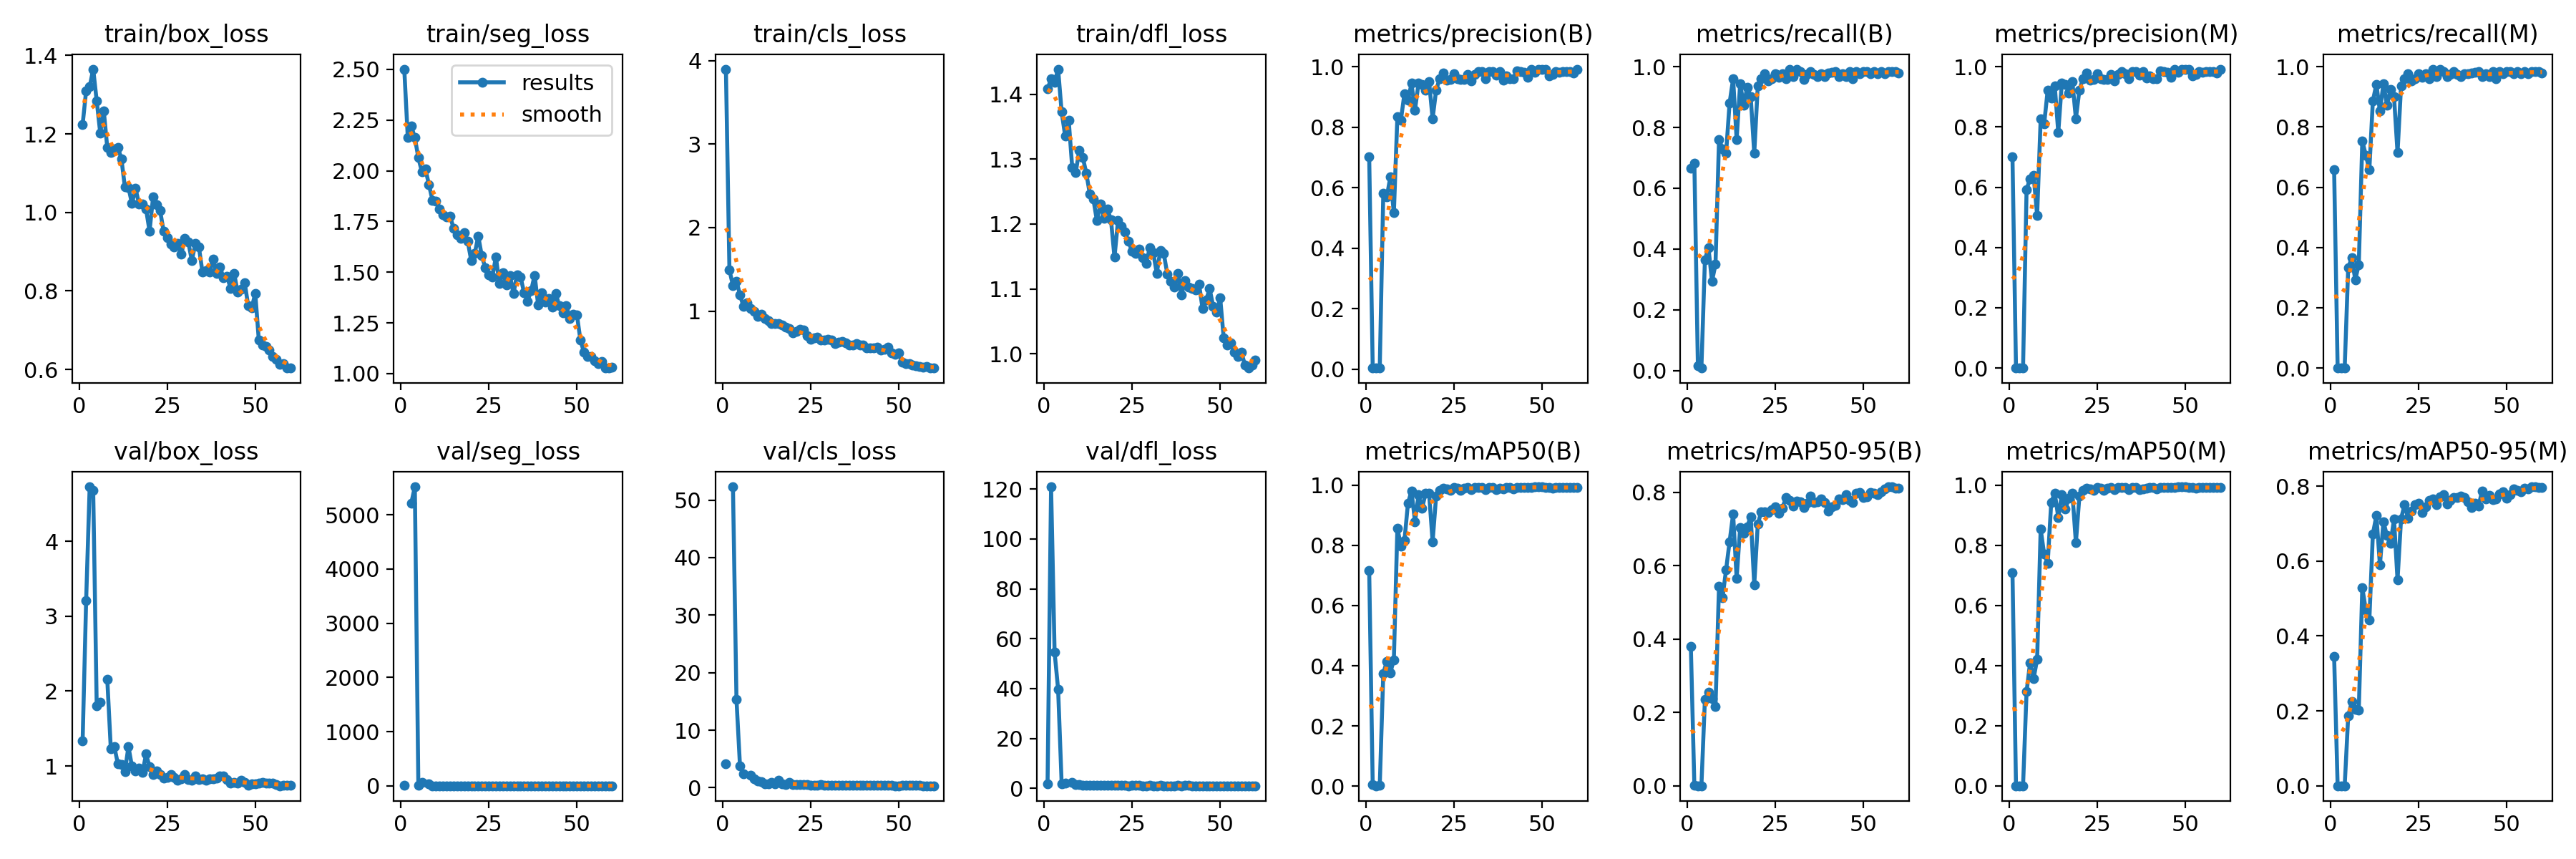

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/results.png', width=800)

## Validation

In [ ]:
!yolo task=segment mode=val model=/{HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 944.3±555.2 MB/s, size: 58.5 KB)
val: Scanning /content/BRAIN-TUMOR-1/valid/labels.cache... 123 images, 1 backgrounds, 0 corrupt: 100% 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.77it/s]
                   all        123        126      0.983      0.984      0.992      0.819      0.983      0.984      0.992      0.799
Speed: 2.8ms preprocess, 13.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference

In [ ]:
!yolo task=segment mode=predict model=/{HOME}/runs/segment/train/weights/best.pt conf=.3 source={dataset.location}/test/images

Ultralytics 8.3.131 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/128 /content/BRAIN-TUMOR-1/test/images/y154_jpg.rf.bcc8bca03d5c754b1c3fecab26584b79.jpg: 640x640 1 tumor, 21.0ms
image 2/128 /content/BRAIN-TUMOR-1/test/images/y172_jpg.rf.1de5e52261087615739339dfec693873.jpg: 640x640 1 tumor, 20.3ms
image 3/128 /content/BRAIN-TUMOR-1/test/images/y17_jpg.rf.00e73d21eb12c3ad8e3cb3b5a87805b8.jpg: 640x640 1 tumor, 20.2ms
image 4/128 /content/BRAIN-TUMOR-1/test/images/y192_jpg.rf.d4ef756fbf9c0fd35dc411b61f8aa184.jpg: 640x640 1 tumor, 20.2ms
image 5/128 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.898204dcdfcff60fff55f3734567e205.jpg: 640x640 1 tumor, 20.2ms
image 6/128 /content/BRAIN-TUMOR-1/test/images/y193_jpg.rf.d75ad28b5fae3f14d696dfc98ef3d326.jpg: 640x640 1 tumor, 20.2ms
image 7/128 /content/BRAIN-TUMOR-1/test/images/y196_jpg.rf.cb679791b2f16798391d0a24d51aca4c.jpg: 640x6

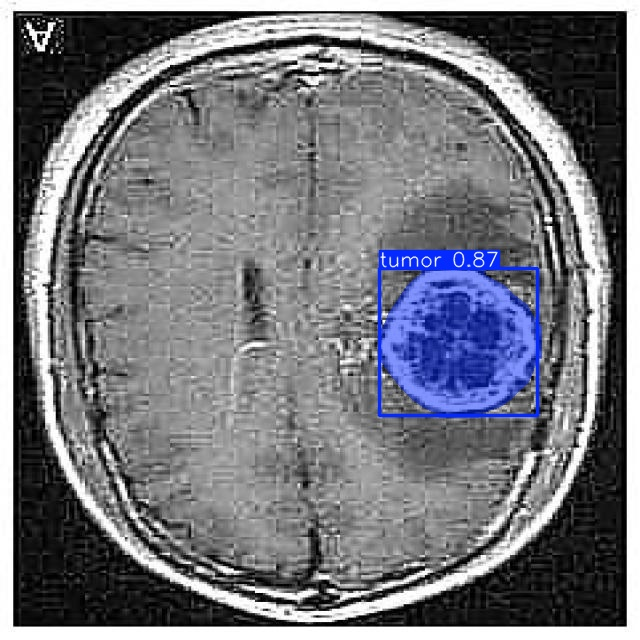

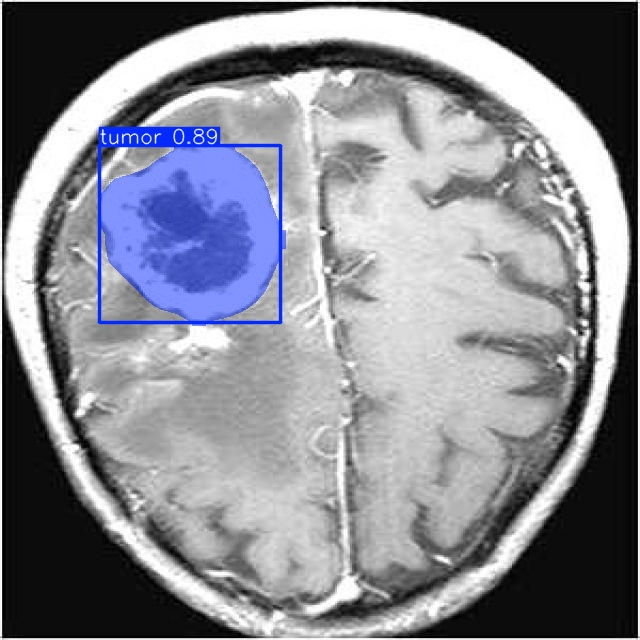

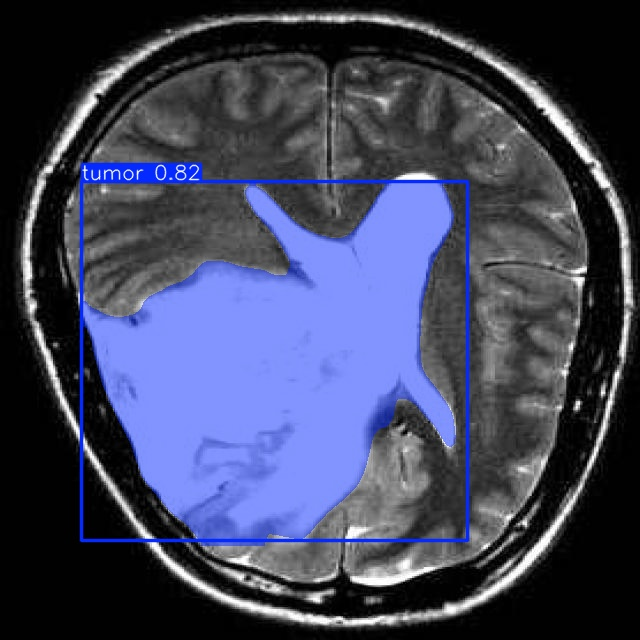

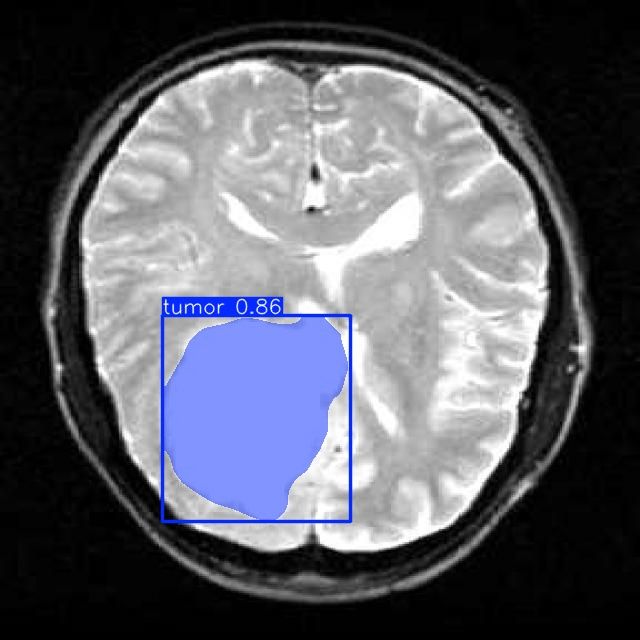

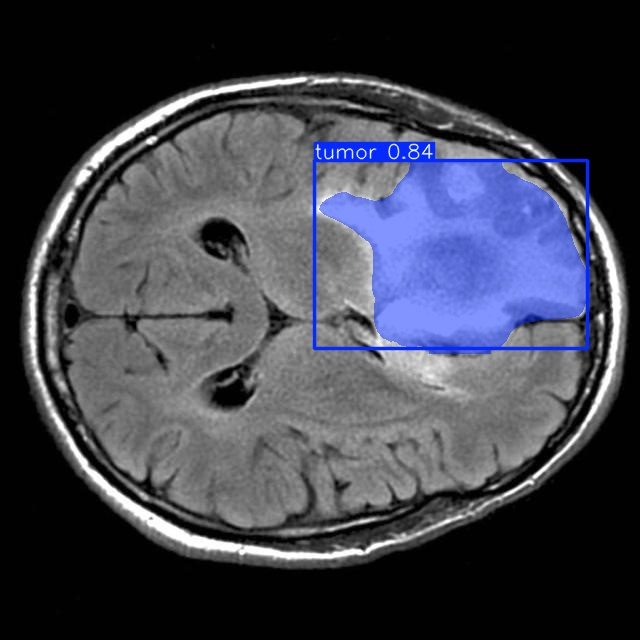

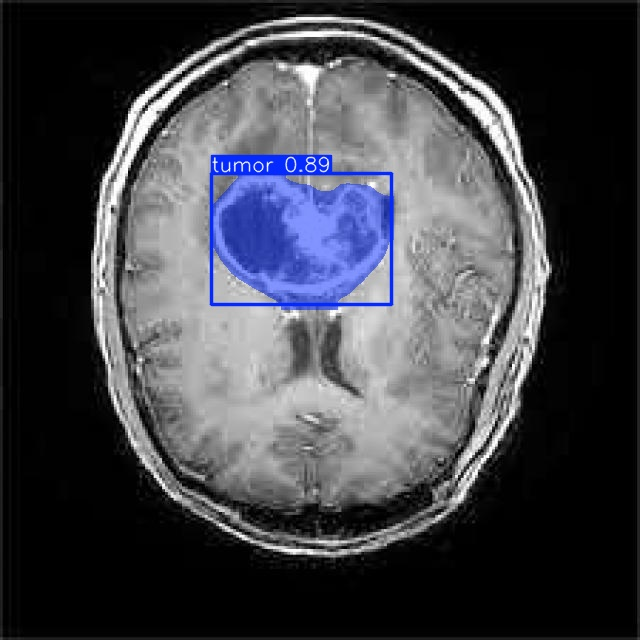

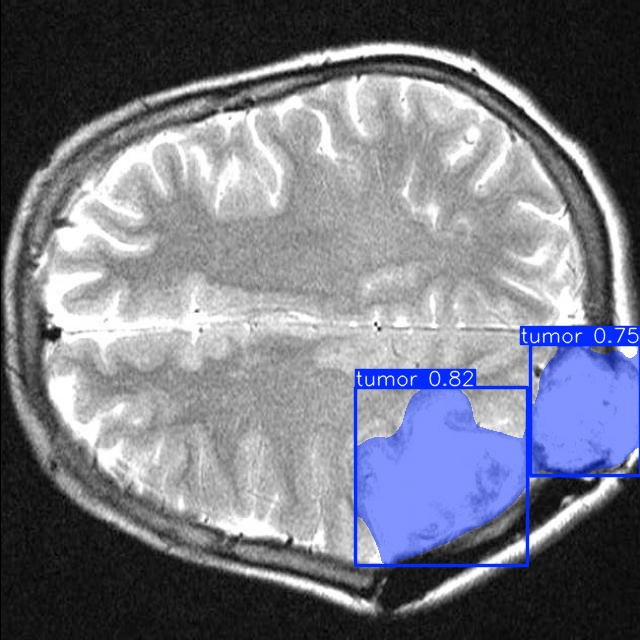

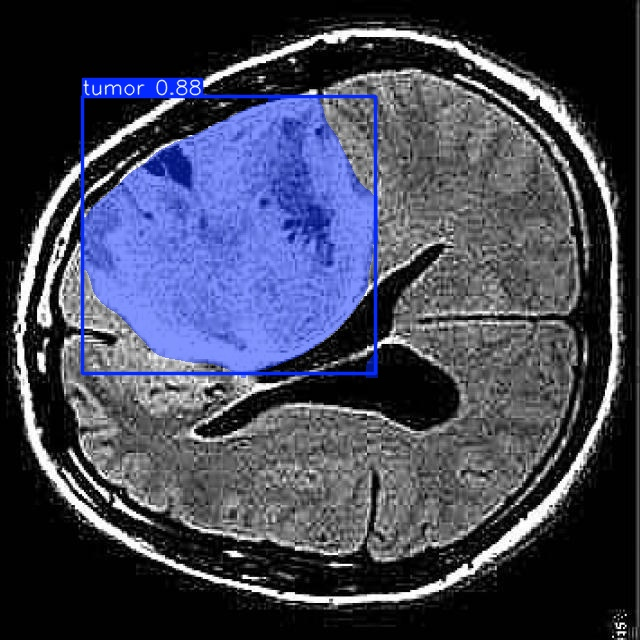

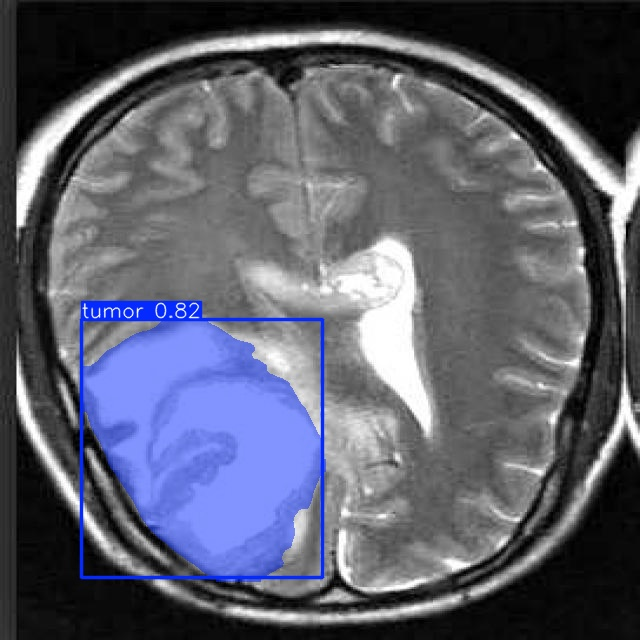

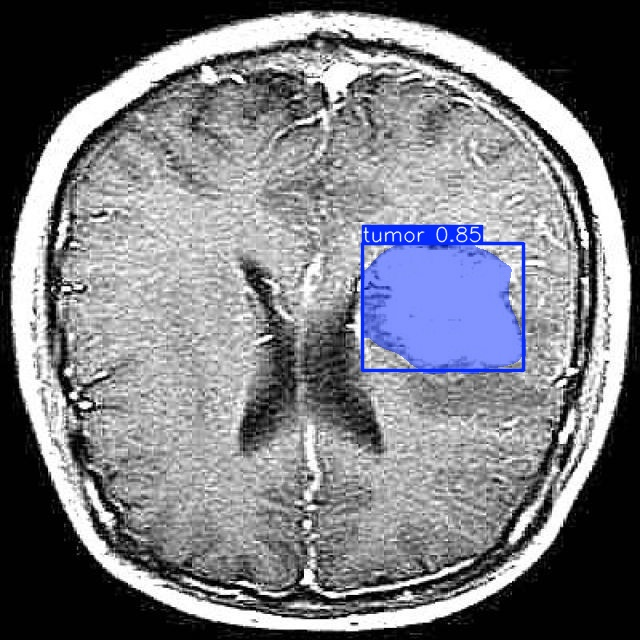

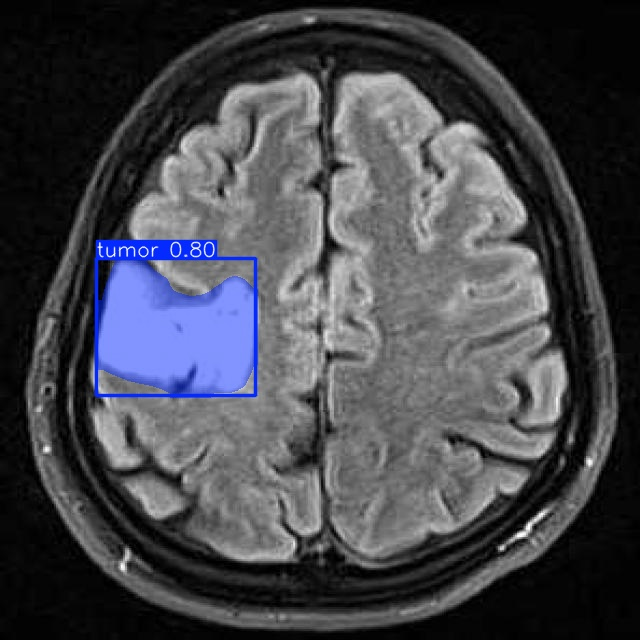

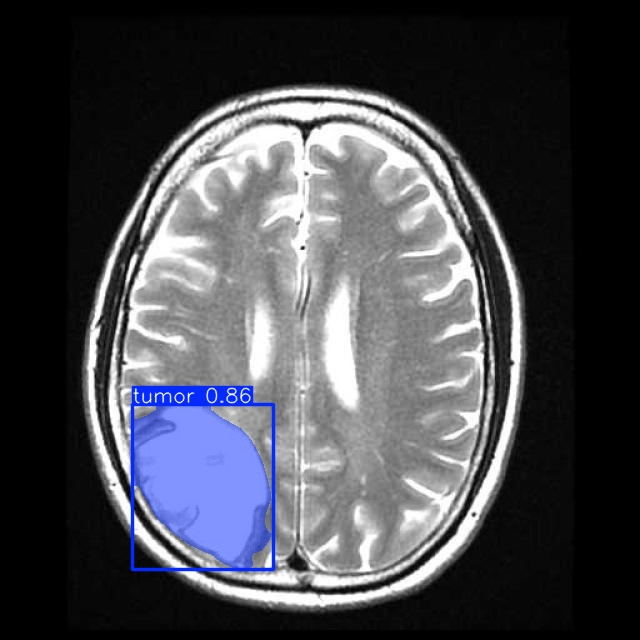

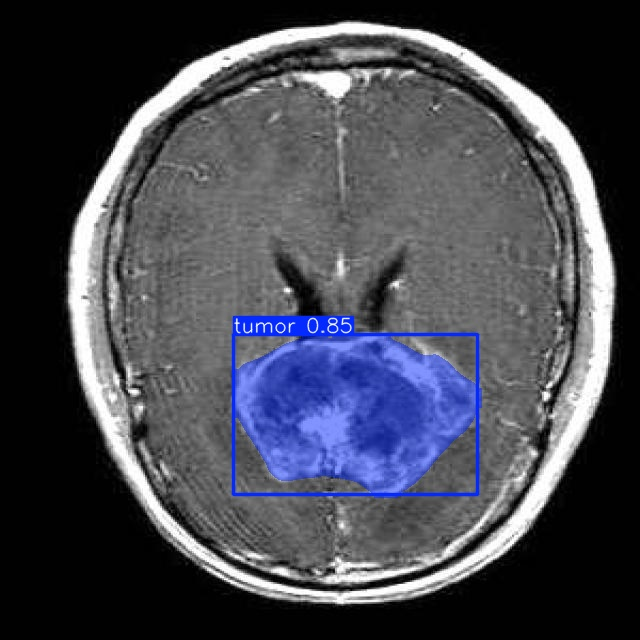

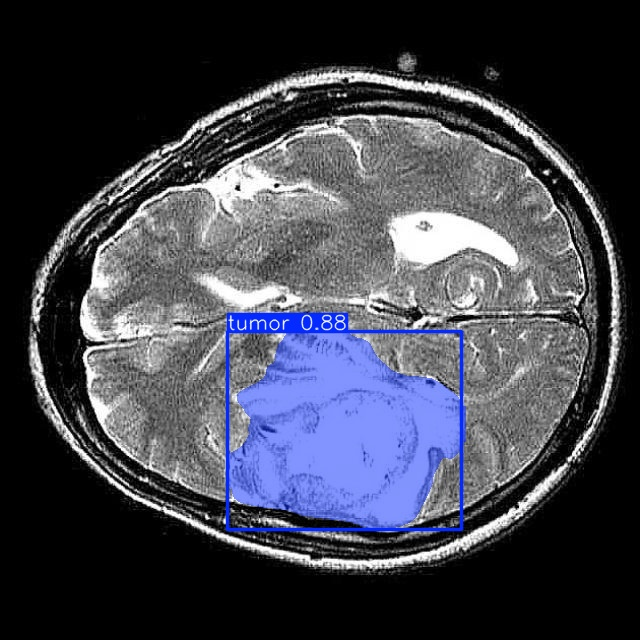

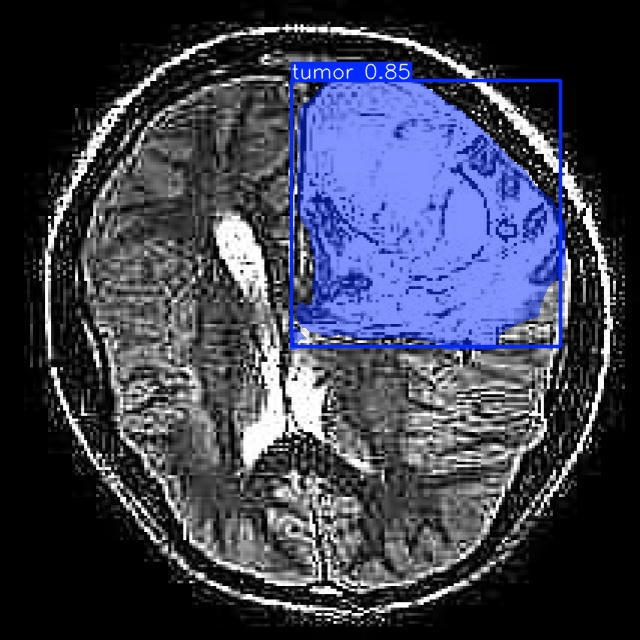

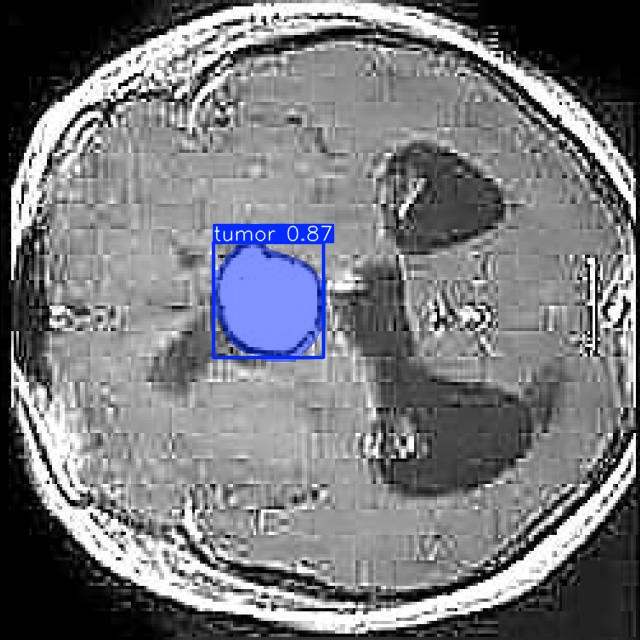

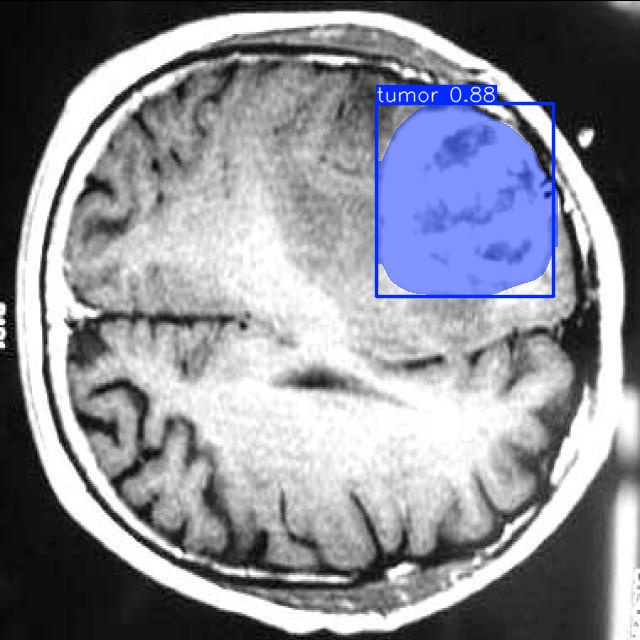

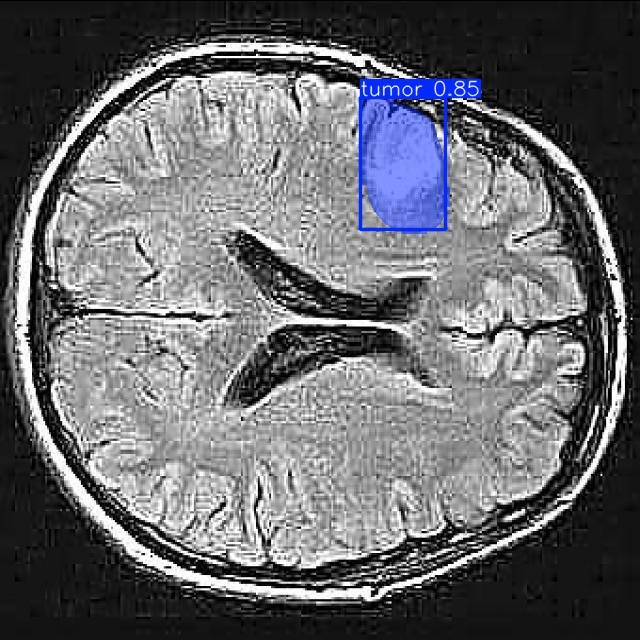

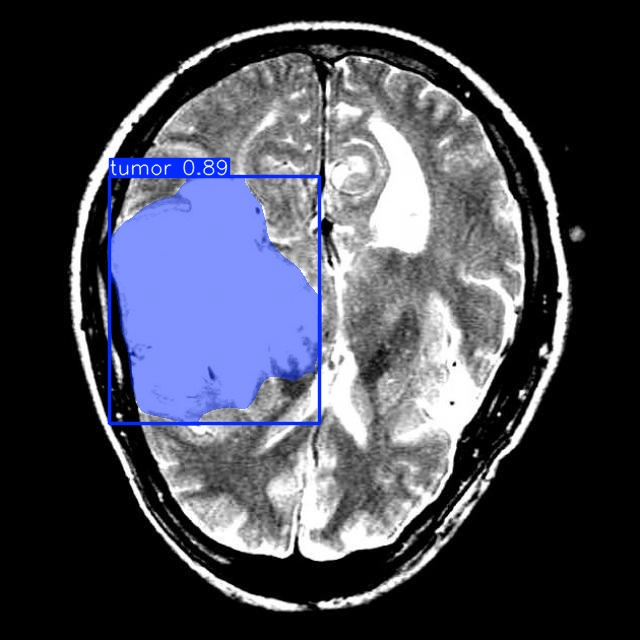

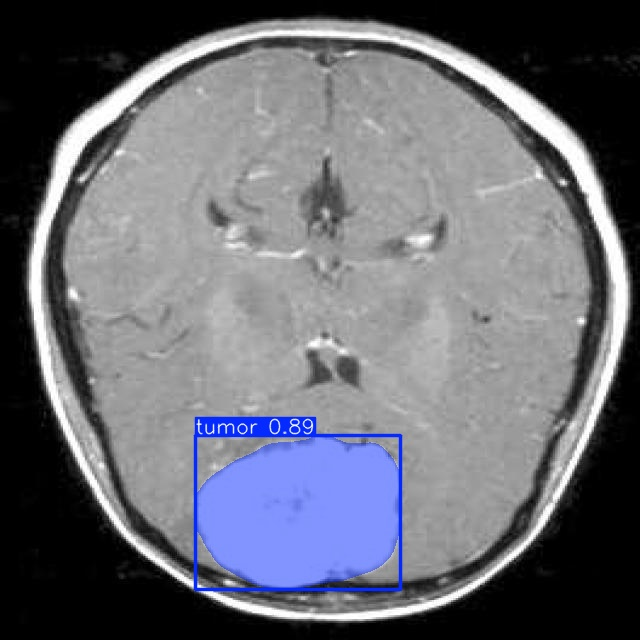

In [ ]:
import glob
from IPython.display import display, Image


for img_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
    display(Image(filename=img_path, width=600))
    print('\n')